In [27]:
import pandas as pd
import numpy as np 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st
%matplotlib  inline
plt.style.use('seaborn-darkgrid')
sns.set(style = 'darkgrid')
import  warnings
warnings.filterwarnings('ignore')


In [28]:
train = pd.read_csv('file1.csv')
test = pd.read_csv('file2.csv')

# 宏观查看数据

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carid               30000 non-null  int64  
 1   tradeTime           30000 non-null  object 
 2   brand               30000 non-null  int64  
 3   serial              30000 non-null  int64  
 4   model               30000 non-null  int64  
 5   mileage             30000 non-null  float64
 6   color               30000 non-null  int64  
 7   cityId              30000 non-null  int64  
 8   carCode             29991 non-null  float64
 9   transferCount       30000 non-null  int64  
 10  seatings            30000 non-null  int64  
 11  registerDate        30000 non-null  object 
 12  licenseDate         30000 non-null  object 
 13  country             26243 non-null  float64
 14  maketype            26359 non-null  float64
 15  modelyear           29688 non-null  float64
 16  disp

In [30]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carid               5000 non-null   int64  
 1   tradeTime           5000 non-null   object 
 2   brand               5000 non-null   int64  
 3   serial              5000 non-null   int64  
 4   model               5000 non-null   int64  
 5   mileage             5000 non-null   float64
 6   color               5000 non-null   int64  
 7   cityId              5000 non-null   int64  
 8   carCode             5000 non-null   int64  
 9   transferCount       5000 non-null   int64  
 10  seatings            5000 non-null   int64  
 11  registerDate        5000 non-null   object 
 12  licenseDate         5000 non-null   object 
 13  country             4604 non-null   float64
 14  maketype            4625 non-null   float64
 15  modelyear           4894 non-null   float64
 16  displa

# 查看缺失值

In [31]:
import missingno as msn


<AxesSubplot:>

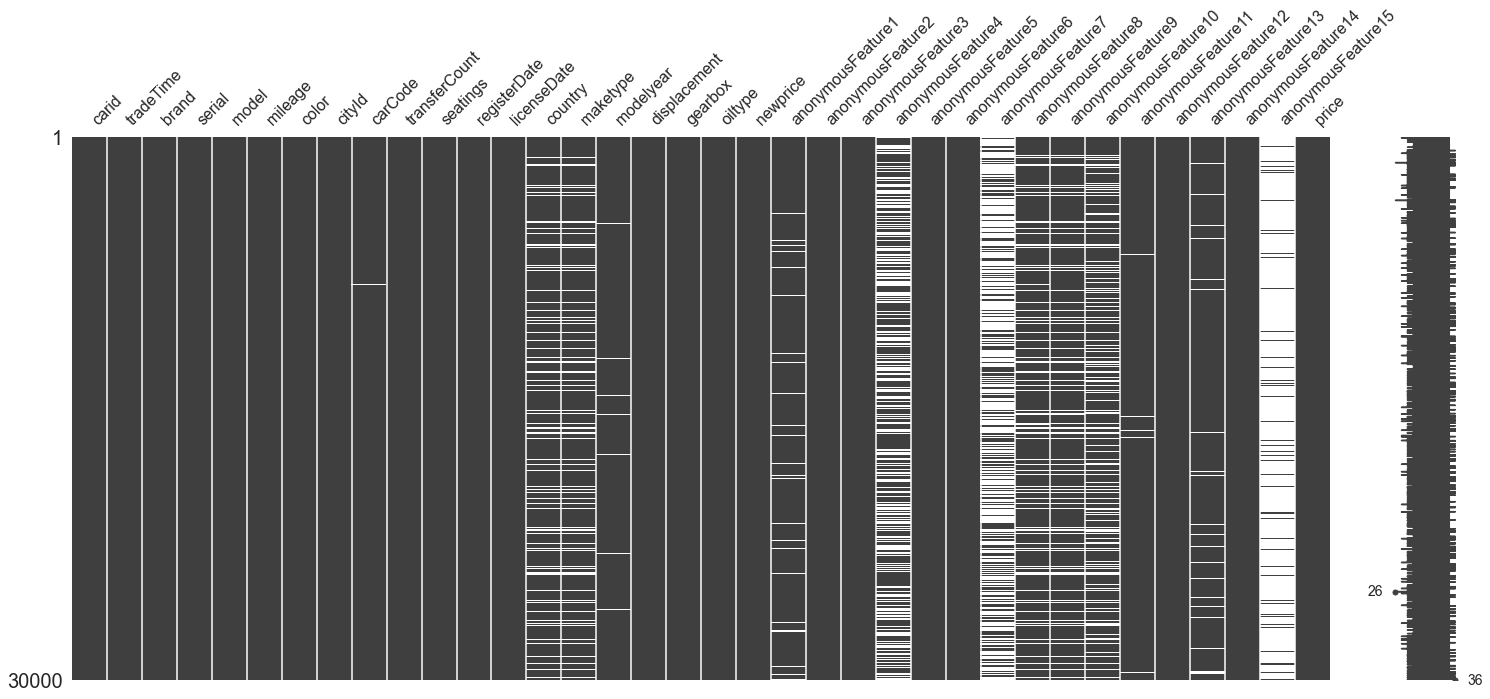

In [32]:
msn.matrix(train)

carCode、modelyear、country、maketype、a1、a11缺失值较少，可以选择填充或者删除该行缺失值a4、a7、a8、a9、a10、a13、a15缺失值较多，可以直接不要这个字段的列

<AxesSubplot:>

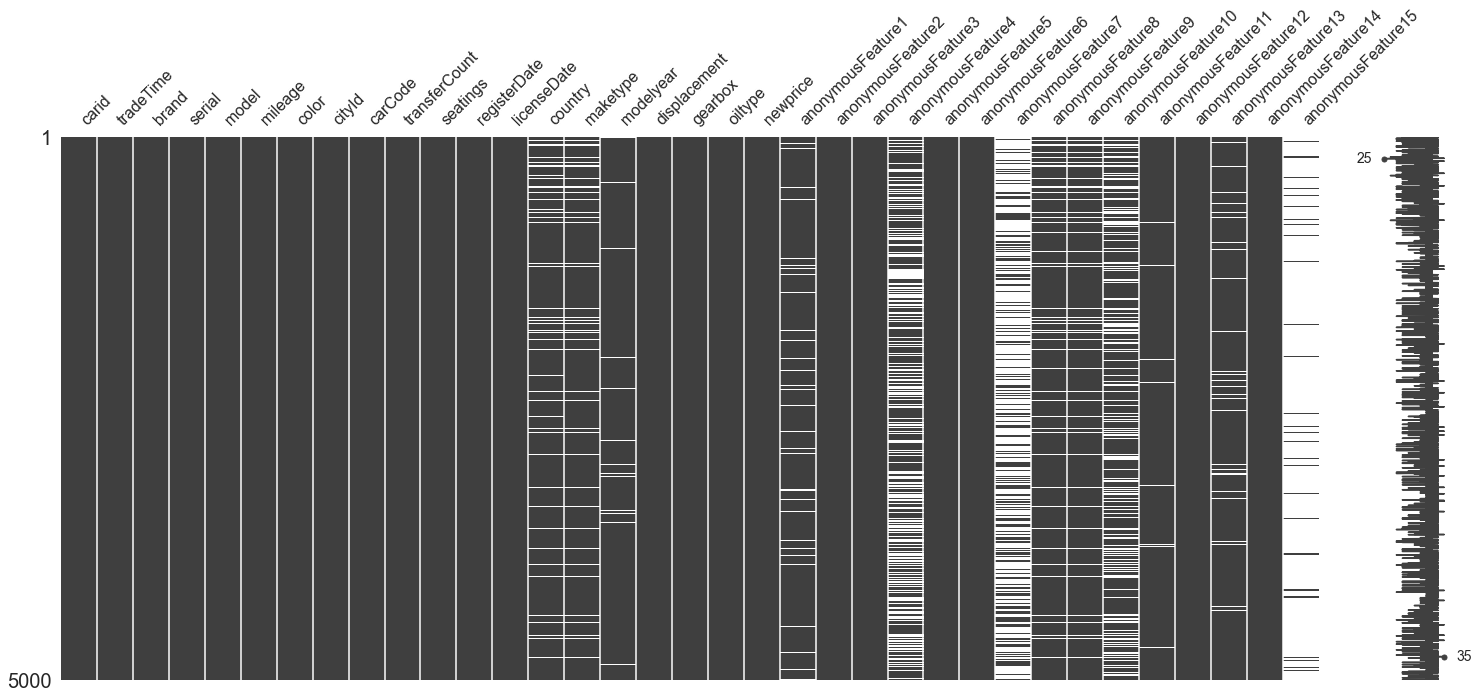

In [33]:
msn.matrix(test)

测试集缺失值和训练集相似，和训练集同样的处理方式

# 查看异常值

In [34]:
["carid", "tradeTime", "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings", "registerDate",
                    "licenseDate", "country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice", "anonymousFeature1", "anonymousFeature2",
                    "anonymousFeature3", "anonymousFeature4", "anonymousFeature5", "anonymousFeature6", "anonymousFeature7", "anonymousFeature8", "anonymousFeature9",
                    "anonymousFeature10", "anonymousFeature11", "anonymousFeature12", "anonymousFeature13", "anonymousFeature14", "anonymousFeature15", "price"]

['carid',
 'tradeTime',
 'brand',
 'serial',
 'model',
 'mileage',
 'color',
 'cityId',
 'carCode',
 'transferCount',
 'seatings',
 'registerDate',
 'licenseDate',
 'country',
 'maketype',
 'modelyear',
 'displacement',
 'gearbox',
 'oiltype',
 'newprice',
 'anonymousFeature1',
 'anonymousFeature2',
 'anonymousFeature3',
 'anonymousFeature4',
 'anonymousFeature5',
 'anonymousFeature6',
 'anonymousFeature7',
 'anonymousFeature8',
 'anonymousFeature9',
 'anonymousFeature10',
 'anonymousFeature11',
 'anonymousFeature12',
 'anonymousFeature13',
 'anonymousFeature14',
 'anonymousFeature15',
 'price']

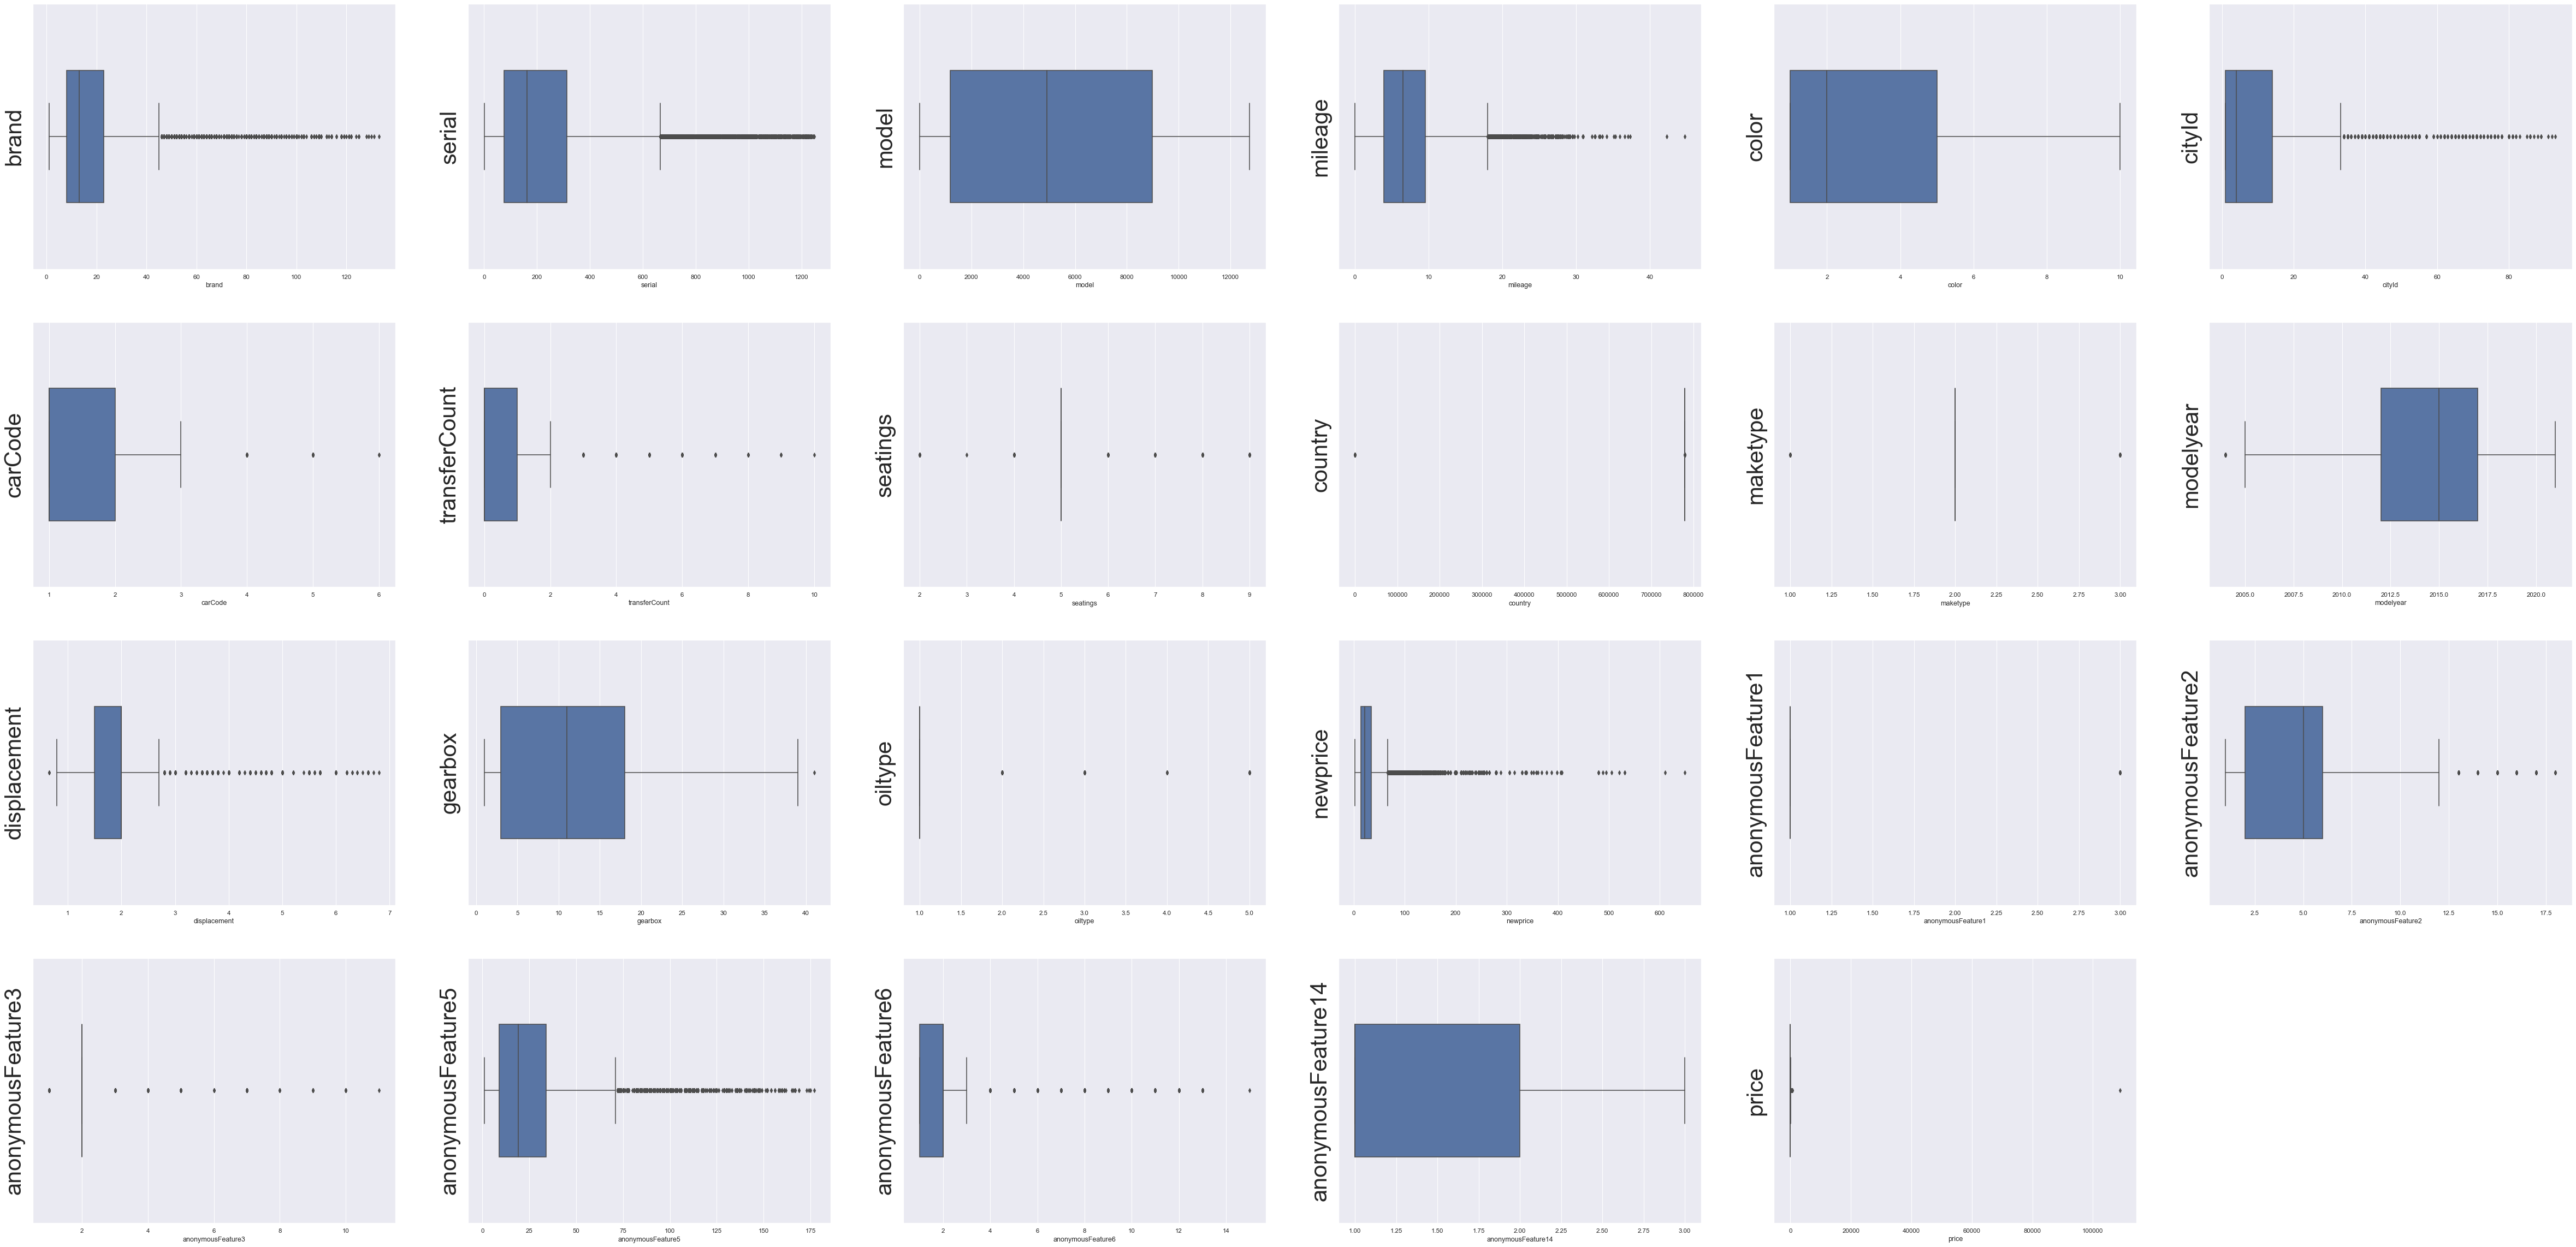

In [35]:
column = [ "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings",
"country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice", "anonymousFeature1", "anonymousFeature2",
                    "anonymousFeature3", "anonymousFeature5", "anonymousFeature6", "anonymousFeature14","price"]
fig = plt.figure(figsize=(80,60),dpi=75)
for i in range(len(column)):
    plt.subplot(6,6,i+1)
    sns.boxplot(train[column[i]],orient= 'v',width=0.5)
    plt.ylabel(column[i],fontsize = 40)
plt.savefig(
    'box.png')
plt.show()



# 查看分布

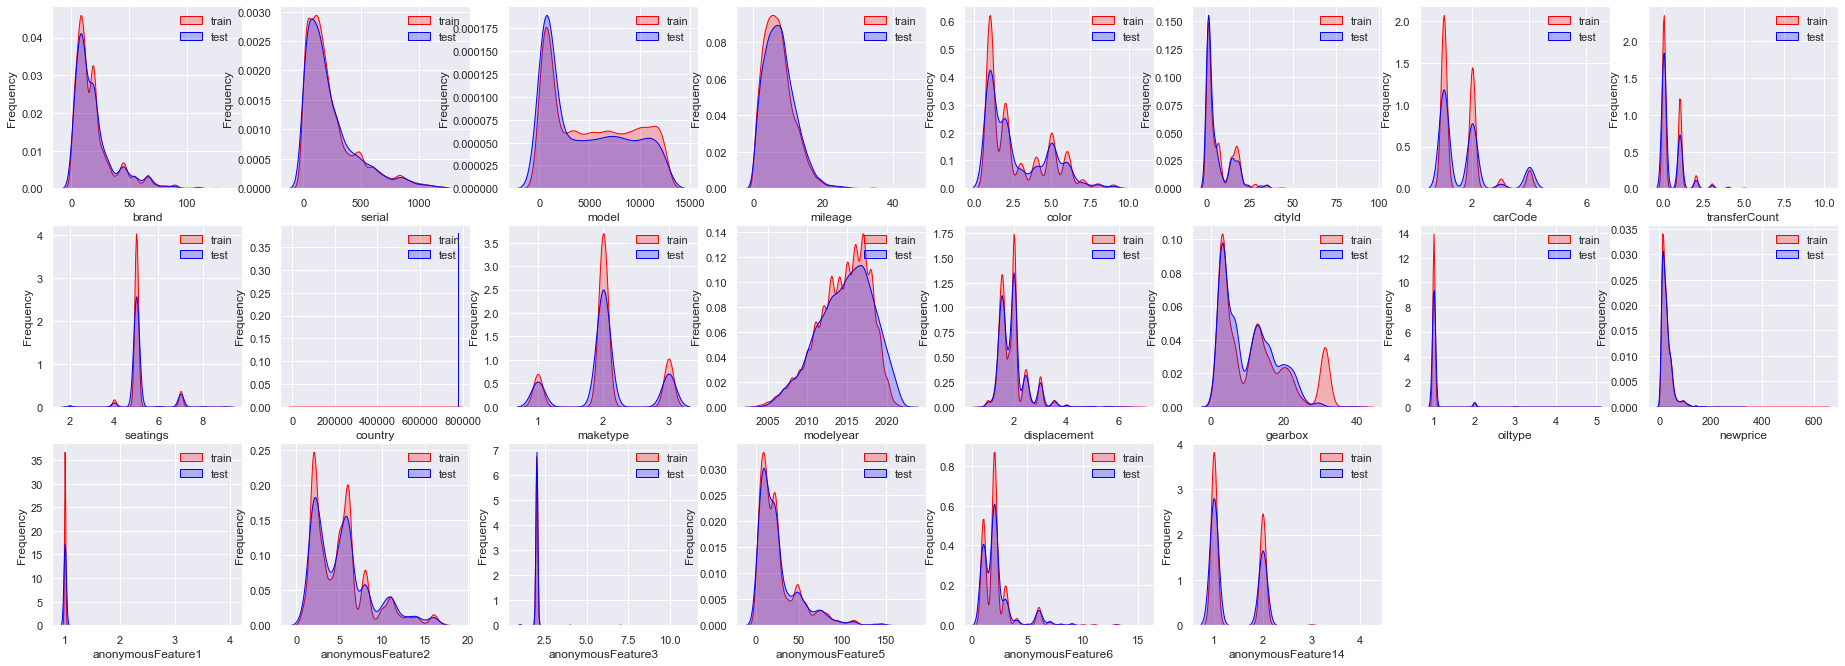

In [36]:
# 所有字段的分布
dist_cols = 8
dist_rows = len(test.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i = 1
for col in column:
    if col == 'price':
        continue
    ax = plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train[col],color='Red',shade=True)
    ax  = sns.kdeplot(test[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train','test'])
    i+=1
# plt.savefig(
    # 'distribution.png')
plt.show()


训练集和测试集的每个字段数据分布近似

In [37]:
train['price'].describe()


count     30000.000000
mean         18.062224
std         629.444049
min           0.050000
25%           6.100000
50%          10.479900
75%          18.000000
max      109000.000000
Name: price, dtype: float64

存在异常值，平均在20左右

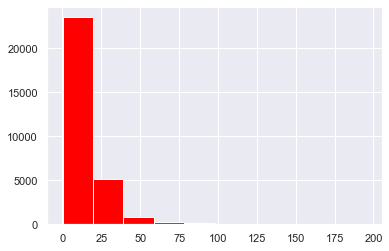

In [38]:
# 插件价格分布，大于200的有20个，平均在75以下
y_p = train[train['price'] <= 200]
## 3) 查看预测值的具体频数
plt.hist(y_p['price'], orientation='vertical',
         histtype='bar', color='red')
# plt.savefig(
#     'price_bar1.png')
plt.show()


In [39]:
n_train = train[train['price']<=75]
n_train


,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,anonymousFeature7,anonymousFeature8,anonymousFeature9,anonymousFeature10,anonymousFeature11,anonymousFeature12,anonymousFeature13,anonymousFeature14,anonymousFeature15,price
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,NaN,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,NaN,4.24
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,NaN,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,NaN,4515*1725*1445,NaN,2,NaN,1.00
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2018-08-18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,2020-09-20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,NaN,1.0,5.0,2.0,1,4295*1705*1570,NaN,1,NaN,0.88
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,2019-09-23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,NaN,8.30
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,NaN,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,NaN,5.00
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,2020-07-09,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,NaN,28.00


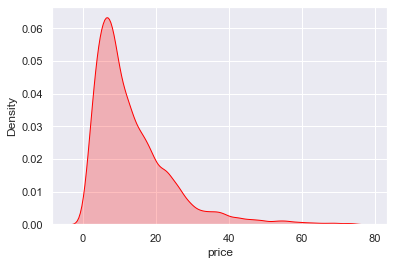

In [40]:
y = n_train['price']
fig = sns.kdeplot(y, color='Red', shade=True)
scatter_fig = fig.get_figure()


数据分布并不符合正态分布，是右偏数据，回归中对数据分布较为敏感，如果不符合正态分布需要进行数据转换成近似正态分布

In [41]:

# 使用对数的右偏变换函数，将数据分布转为近似正态分布
n_train['price'] = np.log1p(n_train['price'])


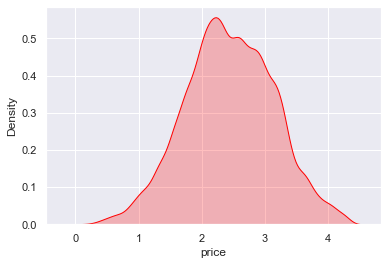

In [42]:
fig = sns.kdeplot(n_train['price'], color='Red', shade=True)
scatter_fig = fig.get_figure()
# scatter_fig.savefig('price_normal.png', dpi=400)


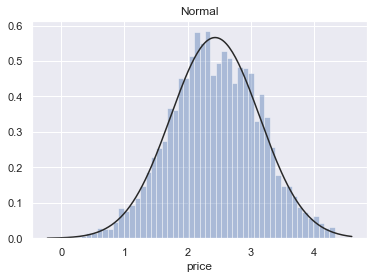

In [43]:
y = n_train['price']
plt.figure(1)
plt.title('Normal')
fig = sns.distplot(y, kde=False, fit=st.norm)
scatter_fig = fig.get_figure()
# scatter_fig.savefig(
#     'price_normal.png', dpi=400)



数据变换后，数据分布近似正态分布

# 查看相关性

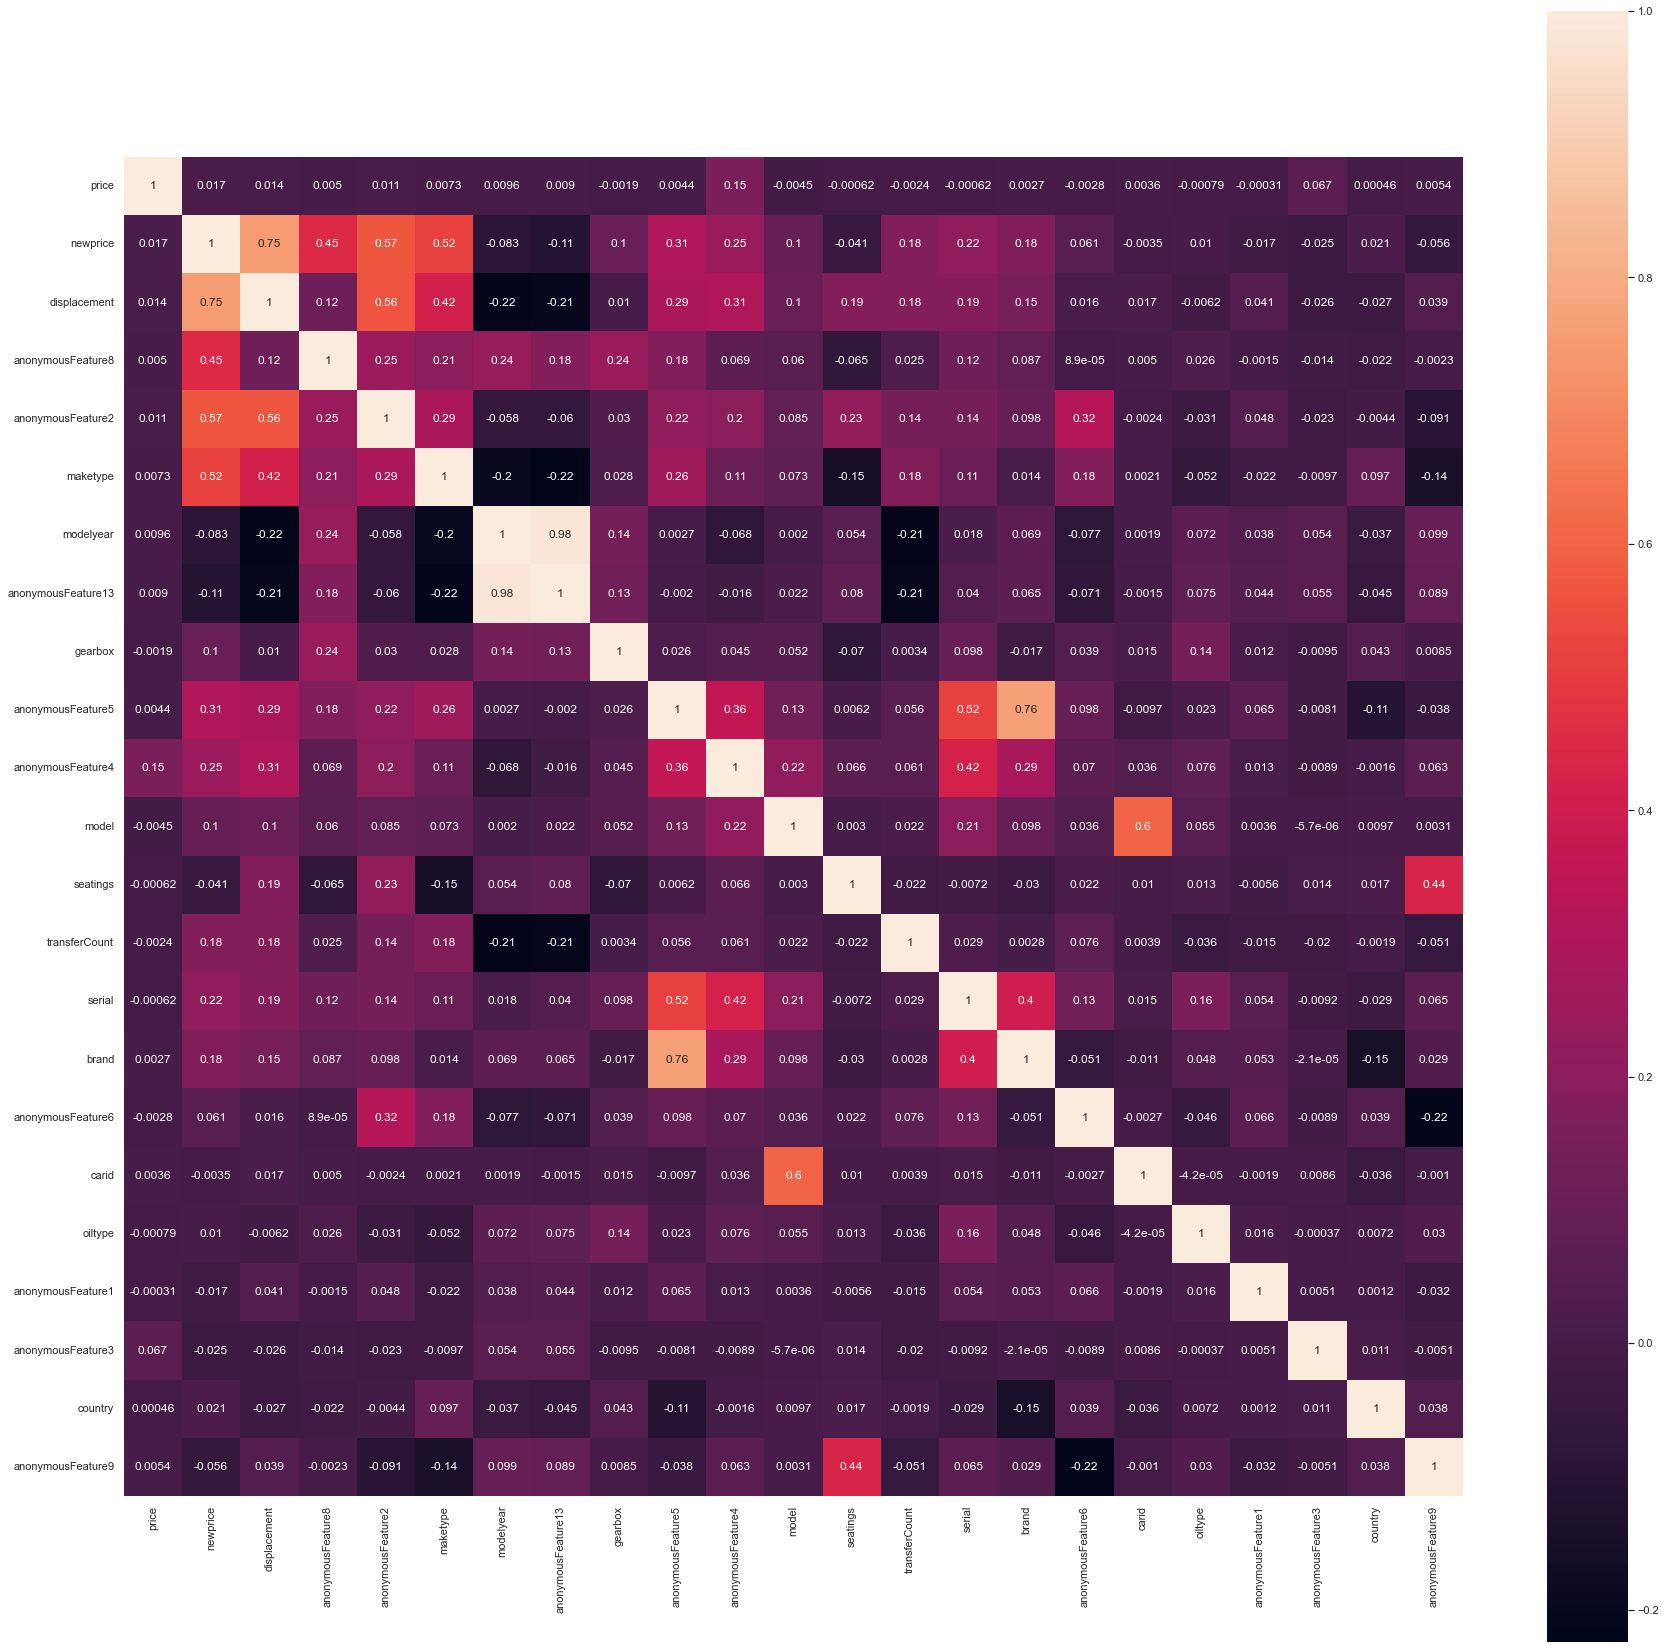

In [44]:
corr = n_train.corr()
k = len(column)
col =  corr.nlargest(k,'price')['price'].index
cm = np.corrcoef(train[col].values.T)
hm = plt.subplots(figsize = (30,30))
hm = sns.heatmap(train[col].corr(),annot=True,square=True)
# plt.savefig('hot_map.png')
plt.show()


newprice、displacement、a_2、maketype、modelyear、gearvox、a_5、model、seatings、transfercount、serial、brand、a_6、oiltype与价格较为相关，且按相关强度排序，其他都是负相关

# 特征类别统计

In [45]:
train.columns

Index(['carid', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color',
       'cityId', 'carCode', 'transferCount', 'seatings', 'registerDate',
       'licenseDate', 'country', 'maketype', 'modelyear', 'displacement',
       'gearbox', 'oiltype', 'newprice', 'anonymousFeature1',
       'anonymousFeature2', 'anonymousFeature3', 'anonymousFeature4',
       'anonymousFeature5', 'anonymousFeature6', 'anonymousFeature7',
       'anonymousFeature8', 'anonymousFeature9', 'anonymousFeature10',
       'anonymousFeature11', 'anonymousFeature12', 'anonymousFeature13',
       'anonymousFeature14', 'anonymousFeature15', 'price'],
      dtype='object')

In [46]:
train.carCode.value_counts()  # 众数是1
test.carCode.value_counts()  # 众数是1
train.modelyear.value_counts()  # 众数是2017
test.modelyear.value_counts()  # 众数是2017


train.country.value_counts()  # 众数是 779412
test.country.value_counts()  # 众数是 779412

train.maketype.value_counts()  # 众数是 2
test.maketype.value_counts()  # 众数是 2

train.anonymousFeature5.value_counts()  # 众数是 8
test.anonymousFeature5.value_counts()  # 众数是 12

train.gearbox.value_counts()  # 众数是 3
test.gearbox.value_counts()  # 众数是 3

train.anonymousFeature1.value_counts()  # 众数是 1
test.anonymousFeature1.value_counts()  # 众数是 1

train.anonymousFeature4.value_counts()  # 众数是 34
test.anonymousFeature4.value_counts()  # 众数是 34

train.anonymousFeature8.value_counts()  # 众数是 1
test.anonymousFeature8.value_counts()  # 众数是 1

train.anonymousFeature9.value_counts()  # 众数是 4
test.anonymousFeature9.value_counts()  # 众数是 5

train.anonymousFeature10.value_counts()  # 众数是 3
# test.anonymousFeature10.value_counts()  # 众数是 2

train.anonymousFeature11.value_counts()  # 众数是 1+2
test.anonymousFeature11.value_counts()  # 众数是 1+2

train.anonymousFeature13.value_counts()  # 众数是 201609
test.anonymousFeature13.value_counts()  # 众数是 201609


201609.0    85
201603.0    83
201710.0    73
201702.0    71
201711.0    66
            ..
200703.0     1
200808.0     1
202104.0     1
202109.0     1
200707.0     1
Name: anonymousFeature13, Length: 167, dtype: int64

1. 时间特征
modelyear
2. 类别特征
离散类别
brand
serial
model
color
cityId
carCode
transferCount
seatings
country
maketype
displacement
gearbox
oiltype
anonymousFeature1
anonymousFeature2
anonymousFeature3
anonymousFeature5
anonymousFeature6
anonymousFeature14
连续类别
mileage
3. 数值特征
newprice
对可分类的连续特征可以进行分桶，对分类特征进行特征交叉，交叉主要获得的是特征交叉后的总数、方差、最大值、最小值、平均数、众数、峰度等。